<a href="https://colab.research.google.com/github/asukul/DS201/blob/master/DS201_Module13_Regressions_Automotive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/asukul/DS201/master/datasets/Automobile_price_data_clean2.csv")

In [11]:
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
1,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775
2,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7995
3,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
4,toyota,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
195,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
196,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
197,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               199 non-null    object 
 1   fuel-type          199 non-null    object 
 2   aspiration         199 non-null    object 
 3   num-of-doors       199 non-null    object 
 4   body-style         199 non-null    object 
 5   drive-wheels       199 non-null    object 
 6   engine-location    199 non-null    object 
 7   wheel-base         199 non-null    float64
 8   length             199 non-null    float64
 9   width              199 non-null    float64
 10  height             199 non-null    float64
 11  curb-weight        199 non-null    int64  
 12  engine-type        199 non-null    object 
 13  num-of-cylinders   199 non-null    object 
 14  engine-size        199 non-null    int64  
 15  fuel-system        199 non-null    object 
 16  bore               199 non

In [13]:
#Linear Regression Example http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [14]:
#sns.pairplot(df)

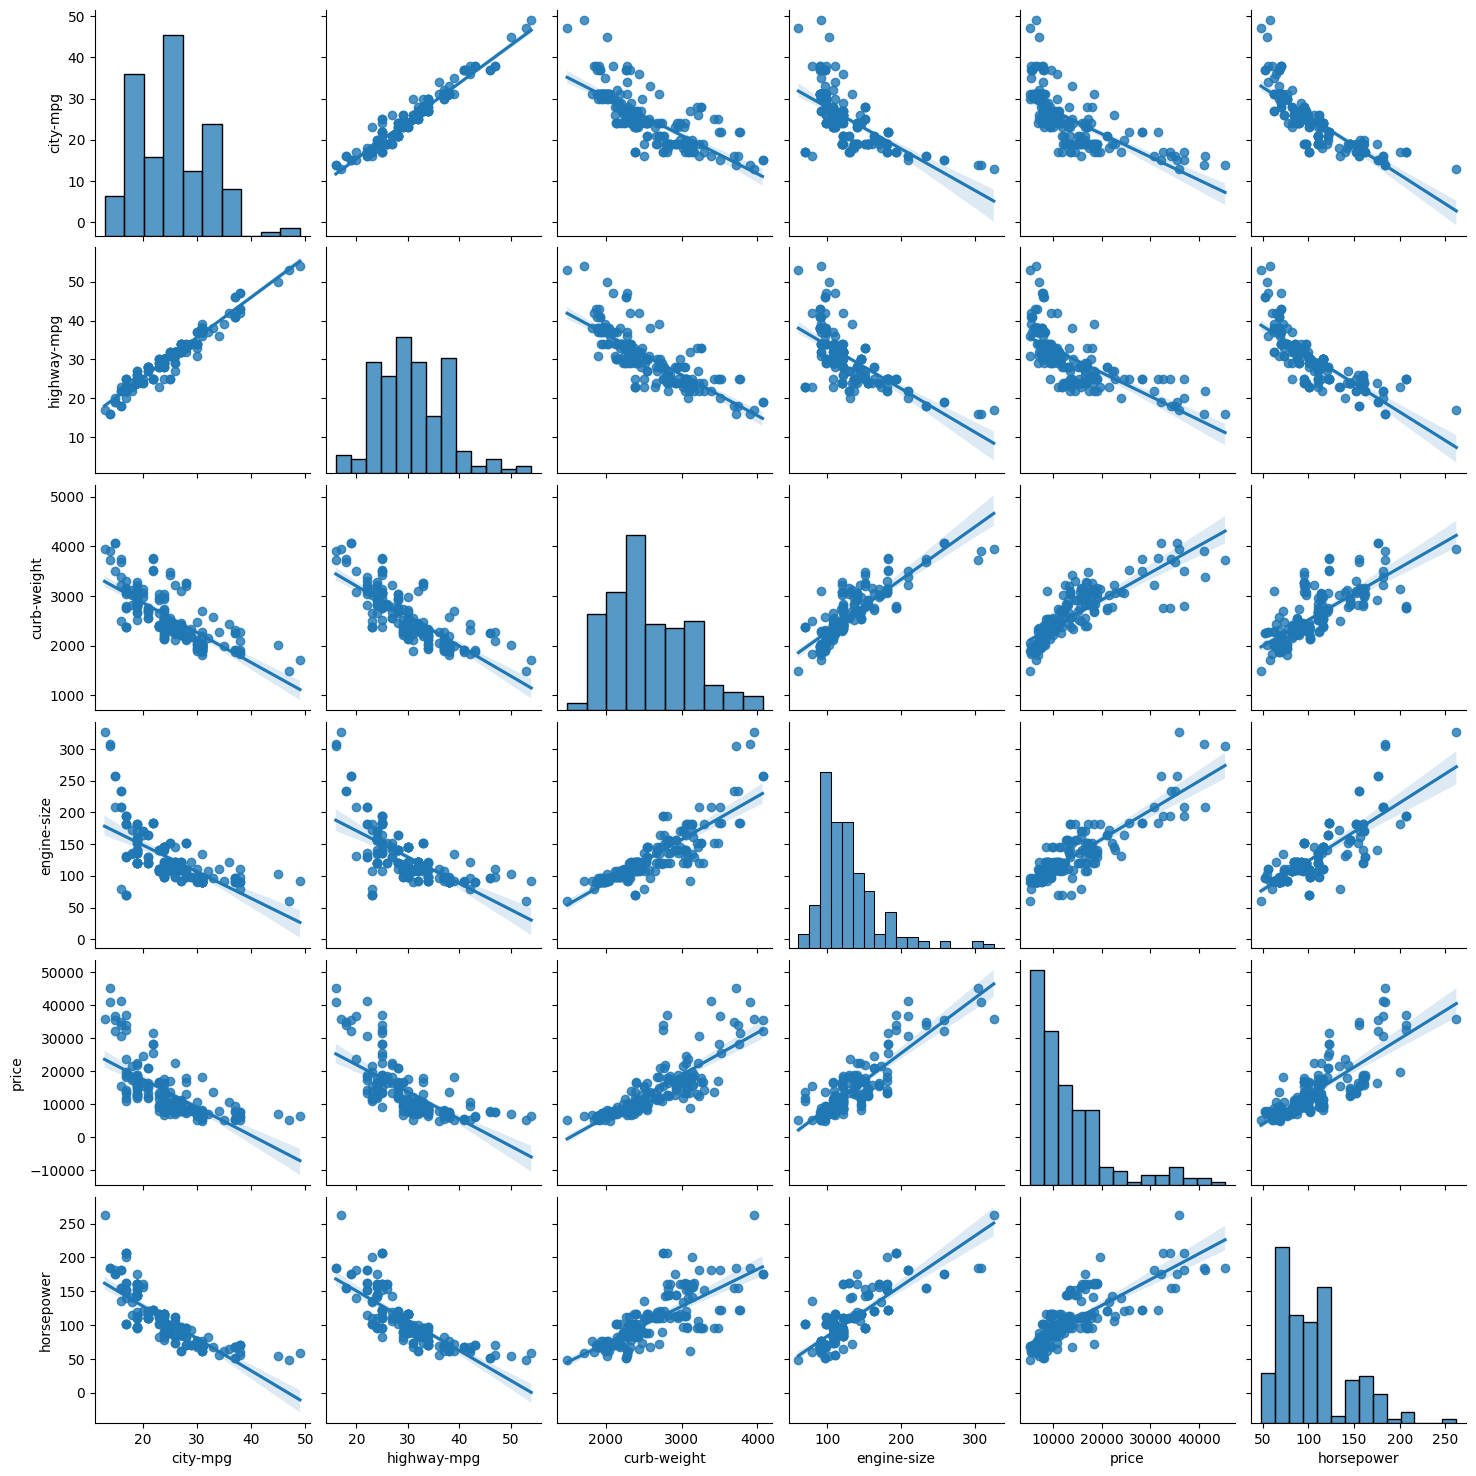

In [15]:
sns.pairplot(df.loc[:,["city-mpg","highway-mpg","curb-weight","make","engine-size","price", "horsepower"]], kind='reg');

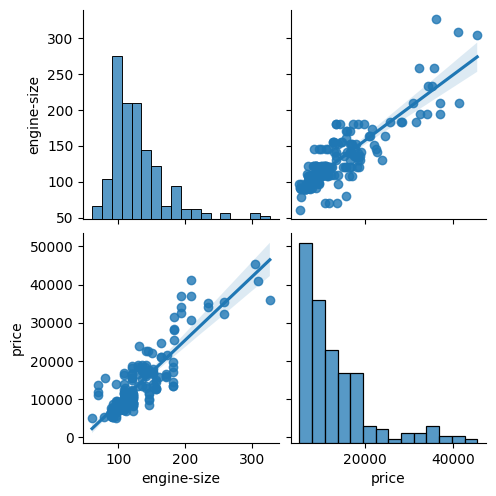

In [16]:
sns.pairplot(df.loc[:,["engine-size","price"]], kind='reg');


In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.583797
length,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.693965
width,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.753871
height,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.134990
curb-weight,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.835090
engine-size,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.873887
compression-ratio,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,-0.214576,-0.436015,0.330587,0.268819,0.069549
horsepower,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,0.107882,-0.822617,-0.804596,0.810533
peak-rpm,-0.360593,-0.286321,-0.245975,-0.311574,-0.279375,-0.256773,-0.436015,0.107882,1.000000,-0.115425,-0.058606,-0.101649
city-mpg,-0.472877,-0.664865,-0.633139,-0.051387,-0.750287,-0.650552,0.330587,-0.822617,-0.115425,1.000000,0.972777,-0.689253


In [18]:
corr = df.corr()

<ipython-input-18-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [19]:
corr.style.background_gradient(cmap="coolwarm")

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,0.371621,-0.360593,-0.472877,-0.543647,0.583797
length,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,0.580309,-0.286321,-0.664865,-0.699033,0.693965
width,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,0.615315,-0.245975,-0.633139,-0.681131,0.753871
height,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.087407,-0.311574,-0.051387,-0.105200,0.134990
curb-weight,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,0.758063,-0.279375,-0.750287,-0.794937,0.835090
engine-size,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,0.822713,-0.256773,-0.650552,-0.679688,0.873887
compression-ratio,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,-0.214576,-0.436015,0.330587,0.268819,0.069549
horsepower,0.371621,0.580309,0.615315,-0.087407,0.758063,0.822713,-0.214576,1.000000,0.107882,-0.822617,-0.804596,0.810533
peak-rpm,-0.360593,-0.286321,-0.245975,-0.311574,-0.279375,-0.256773,-0.436015,0.107882,1.000000,-0.115425,-0.058606,-0.101649
city-mpg,-0.472877,-0.664865,-0.633139,-0.051387,-0.750287,-0.650552,0.330587,-0.822617,-0.115425,1.000000,0.972777,-0.689253


In [20]:
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

<ipython-input-20-d9dd0a8c734b>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="coolwarm").set_precision(2)


,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.00,0.88,0.82,0.59,0.78,0.57,0.25,0.37,-0.36,-0.47,-0.54,0.58
length,0.88,1.00,0.86,0.49,0.88,0.69,0.16,0.58,-0.29,-0.66,-0.70,0.69
width,0.82,0.86,1.00,0.31,0.87,0.73,0.19,0.62,-0.25,-0.63,-0.68,0.75
height,0.59,0.49,0.31,1.00,0.31,0.08,0.26,-0.09,-0.31,-0.05,-0.11,0.13
curb-weight,0.78,0.88,0.87,0.31,1.00,0.85,0.16,0.76,-0.28,-0.75,-0.79,0.84
engine-size,0.57,0.69,0.73,0.08,0.85,1.00,0.03,0.82,-0.26,-0.65,-0.68,0.87
compression-ratio,0.25,0.16,0.19,0.26,0.16,0.03,1.00,-0.21,-0.44,0.33,0.27,0.07
horsepower,0.37,0.58,0.62,-0.09,0.76,0.82,-0.21,1.00,0.11,-0.82,-0.80,0.81
peak-rpm,-0.36,-0.29,-0.25,-0.31,-0.28,-0.26,-0.44,0.11,1.00,-0.12,-0.06,-0.10
city-mpg,-0.47,-0.66,-0.63,-0.05,-0.75,-0.65,0.33,-0.82,-0.12,1.00,0.97,-0.69


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(df[["engine-size"]], df[["price"]], test_size=0.2, random_state=4)

In [23]:
from sklearn.linear_model import LinearRegression

In [31]:
auto_reg = LinearRegression()
auto_reg.fit(X_train,Y_train)


LinearRegression()

In [34]:
import numpy as np

In [39]:
# Show Mean Squared Errer

print("Mean Squared Error:",np.mean(auto_reg.predict(X_test) - Y_test) ** 2)


Mean Squared Error: price    1.832891e+06
dtype: float64


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [40]:
from sklearn.metrics import r2_score

In [42]:
Y_pred = auto_reg.predict(X_test)

In [44]:
# R2 score
r2_score(Y_pred, Y_test)

0.6583297023044845

In [53]:
#auto_reg.score(Y_pred, Y_test)
#this is something else
auto_reg.score(df[["engine-size"]], df[["price"]])

0.7624901023228401

In [46]:
#try improving score with feature engineering

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               199 non-null    object 
 1   fuel-type          199 non-null    object 
 2   aspiration         199 non-null    object 
 3   num-of-doors       199 non-null    object 
 4   body-style         199 non-null    object 
 5   drive-wheels       199 non-null    object 
 6   engine-location    199 non-null    object 
 7   wheel-base         199 non-null    float64
 8   length             199 non-null    float64
 9   width              199 non-null    float64
 10  height             199 non-null    float64
 11  curb-weight        199 non-null    int64  
 12  engine-type        199 non-null    object 
 13  num-of-cylinders   199 non-null    object 
 14  engine-size        199 non-null    int64  
 15  fuel-system        199 non-null    object 
 16  bore               199 non

<Axes: xlabel='make', ylabel='price'>

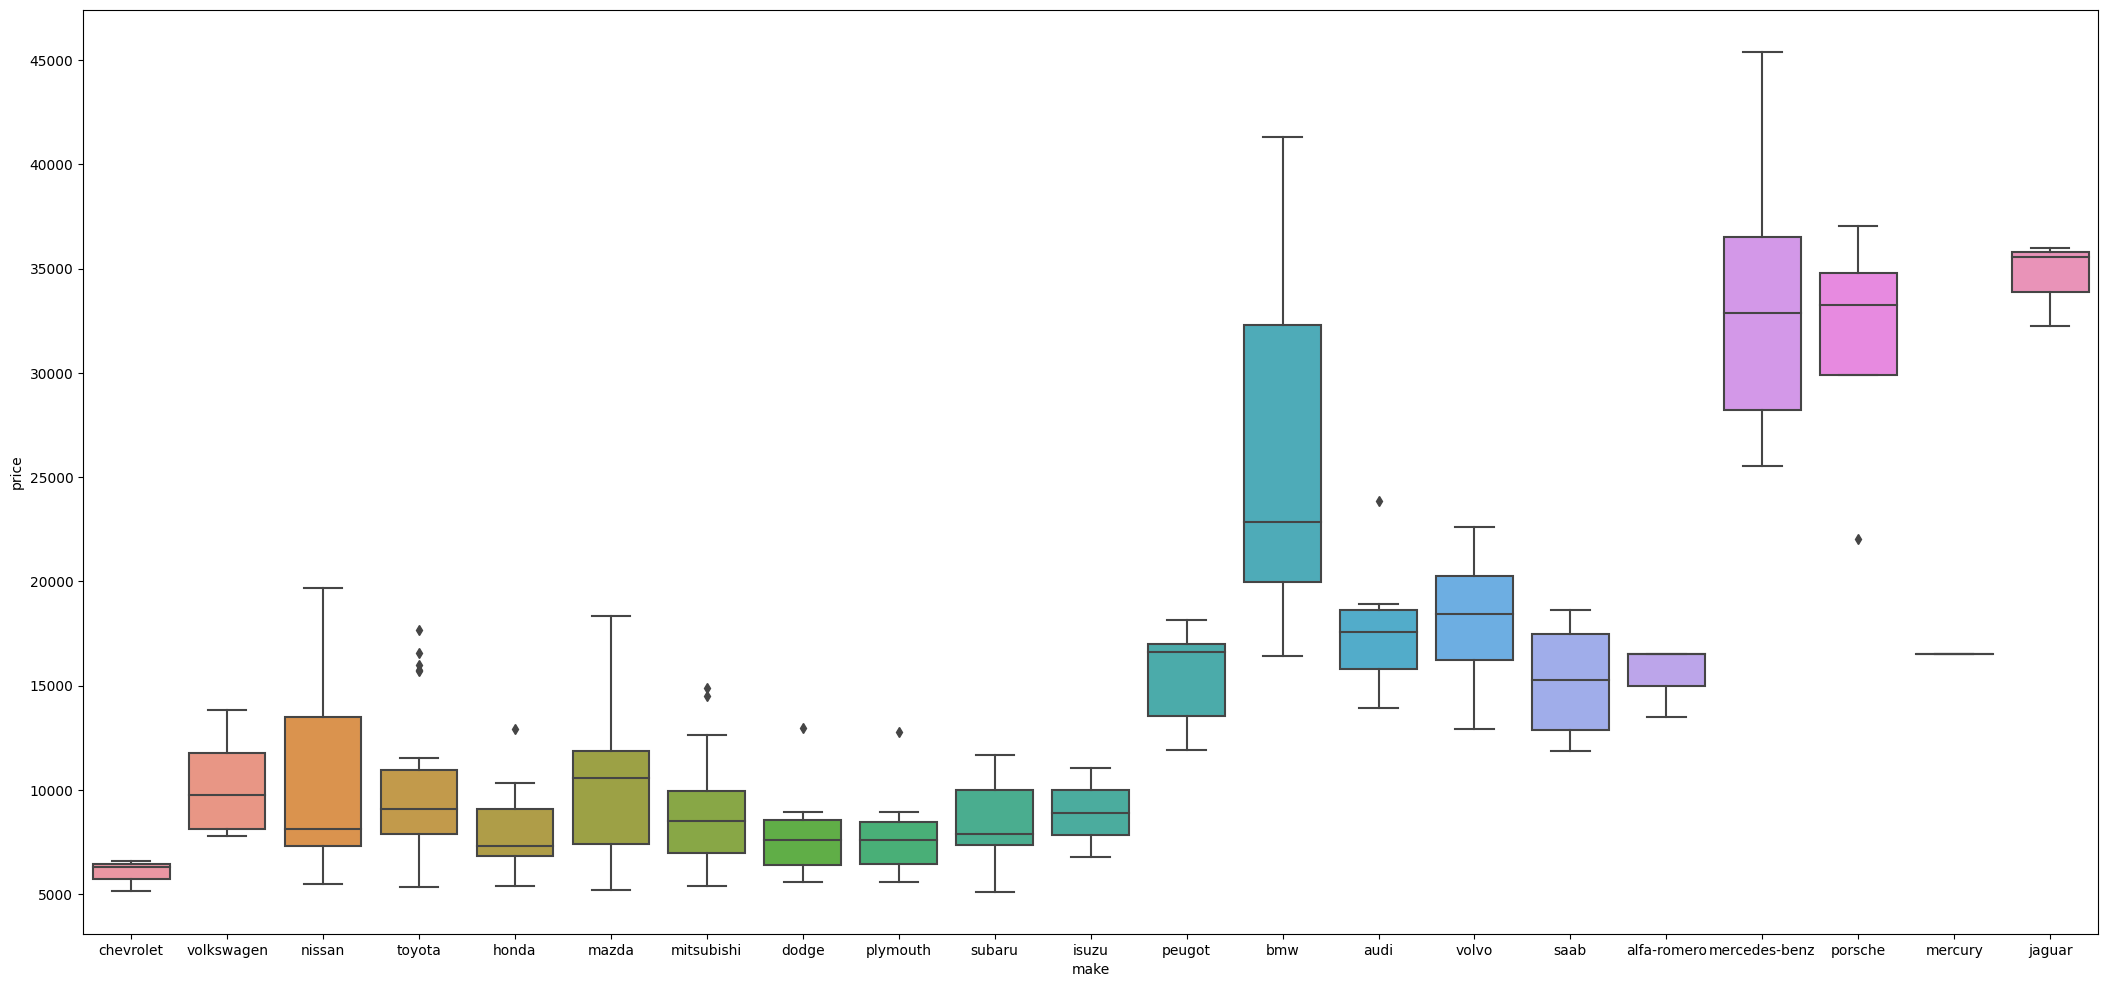

In [48]:
plt.figure(figsize=(26,12))
sns.boxplot(x="make",y="price",data=df)

<Axes: xlabel='make', ylabel='price'>

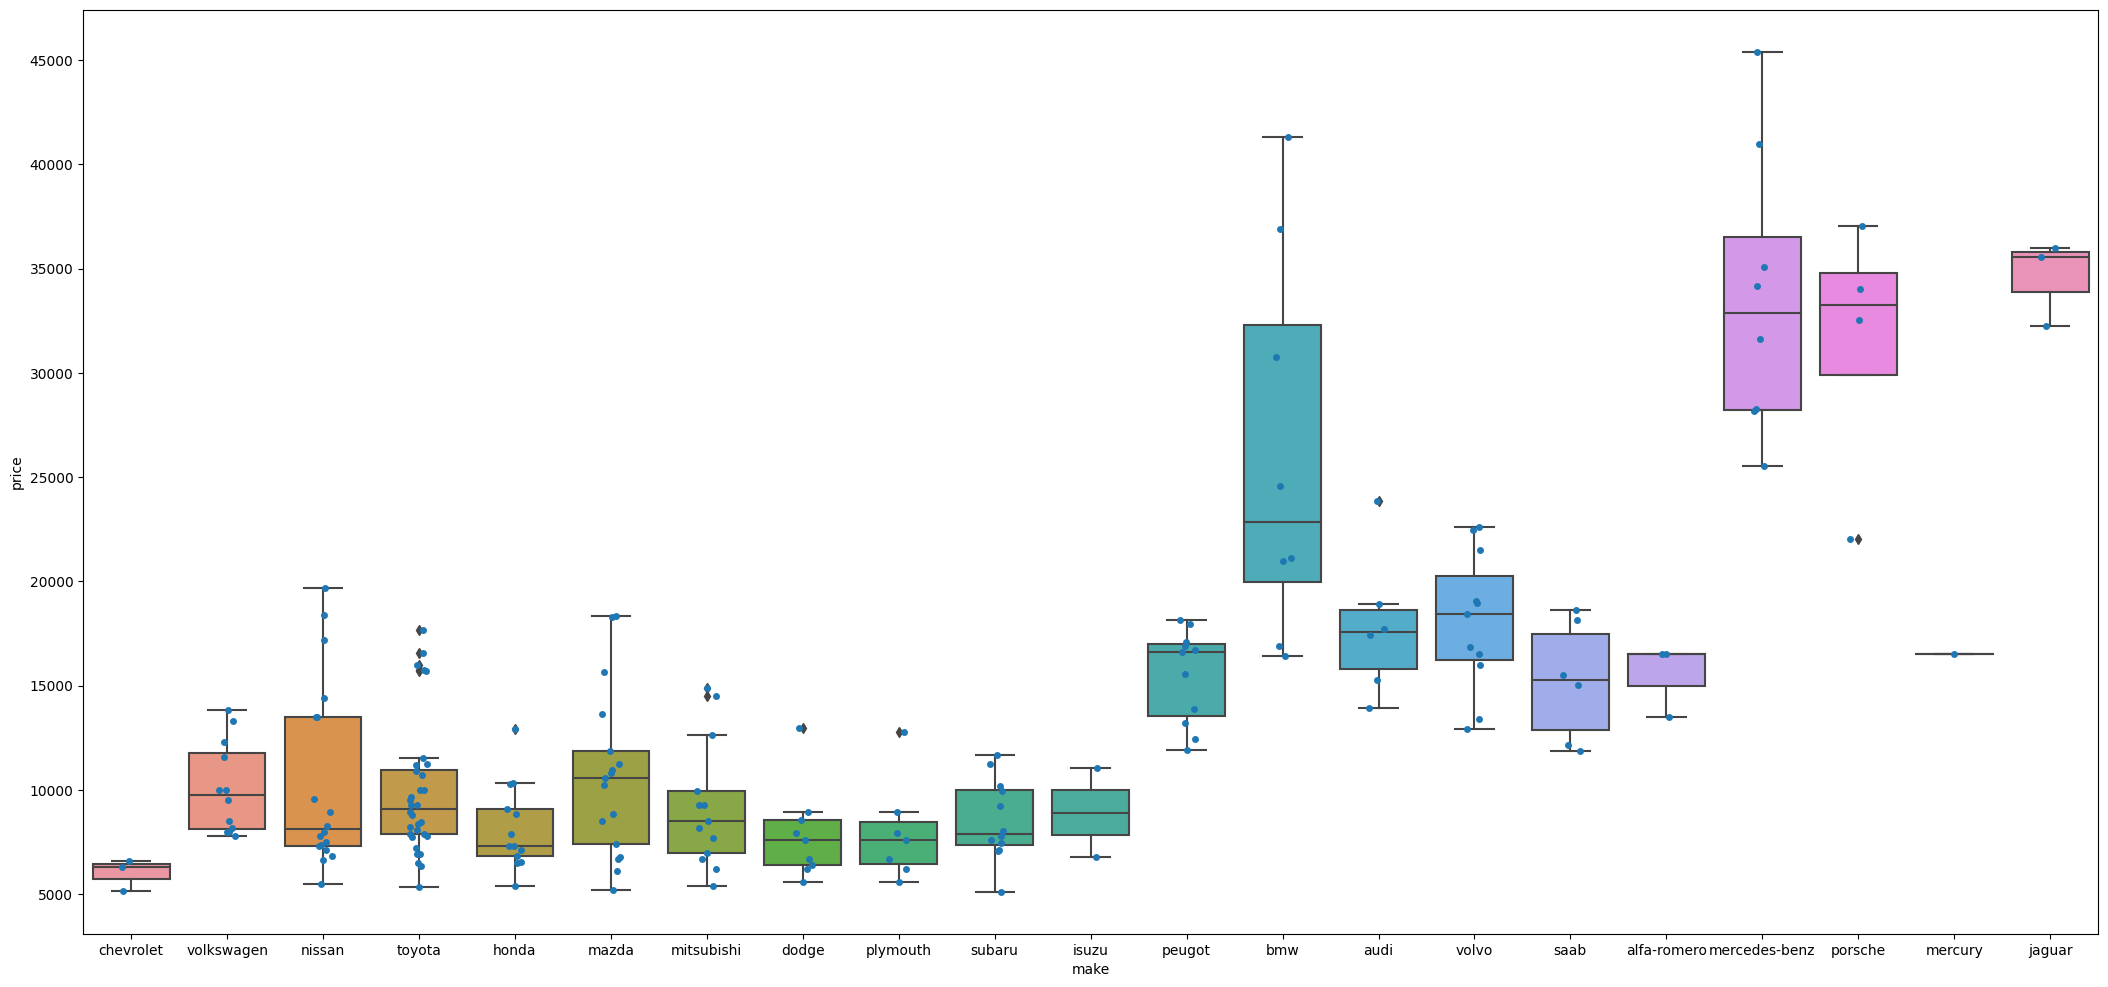

In [50]:
plt.figure(figsize=(26,12))
sns.boxplot(x="make",y="price",data=df)
sns.stripplot(x="make",y="price",data=df)

<Axes: xlabel='make', ylabel='price'>

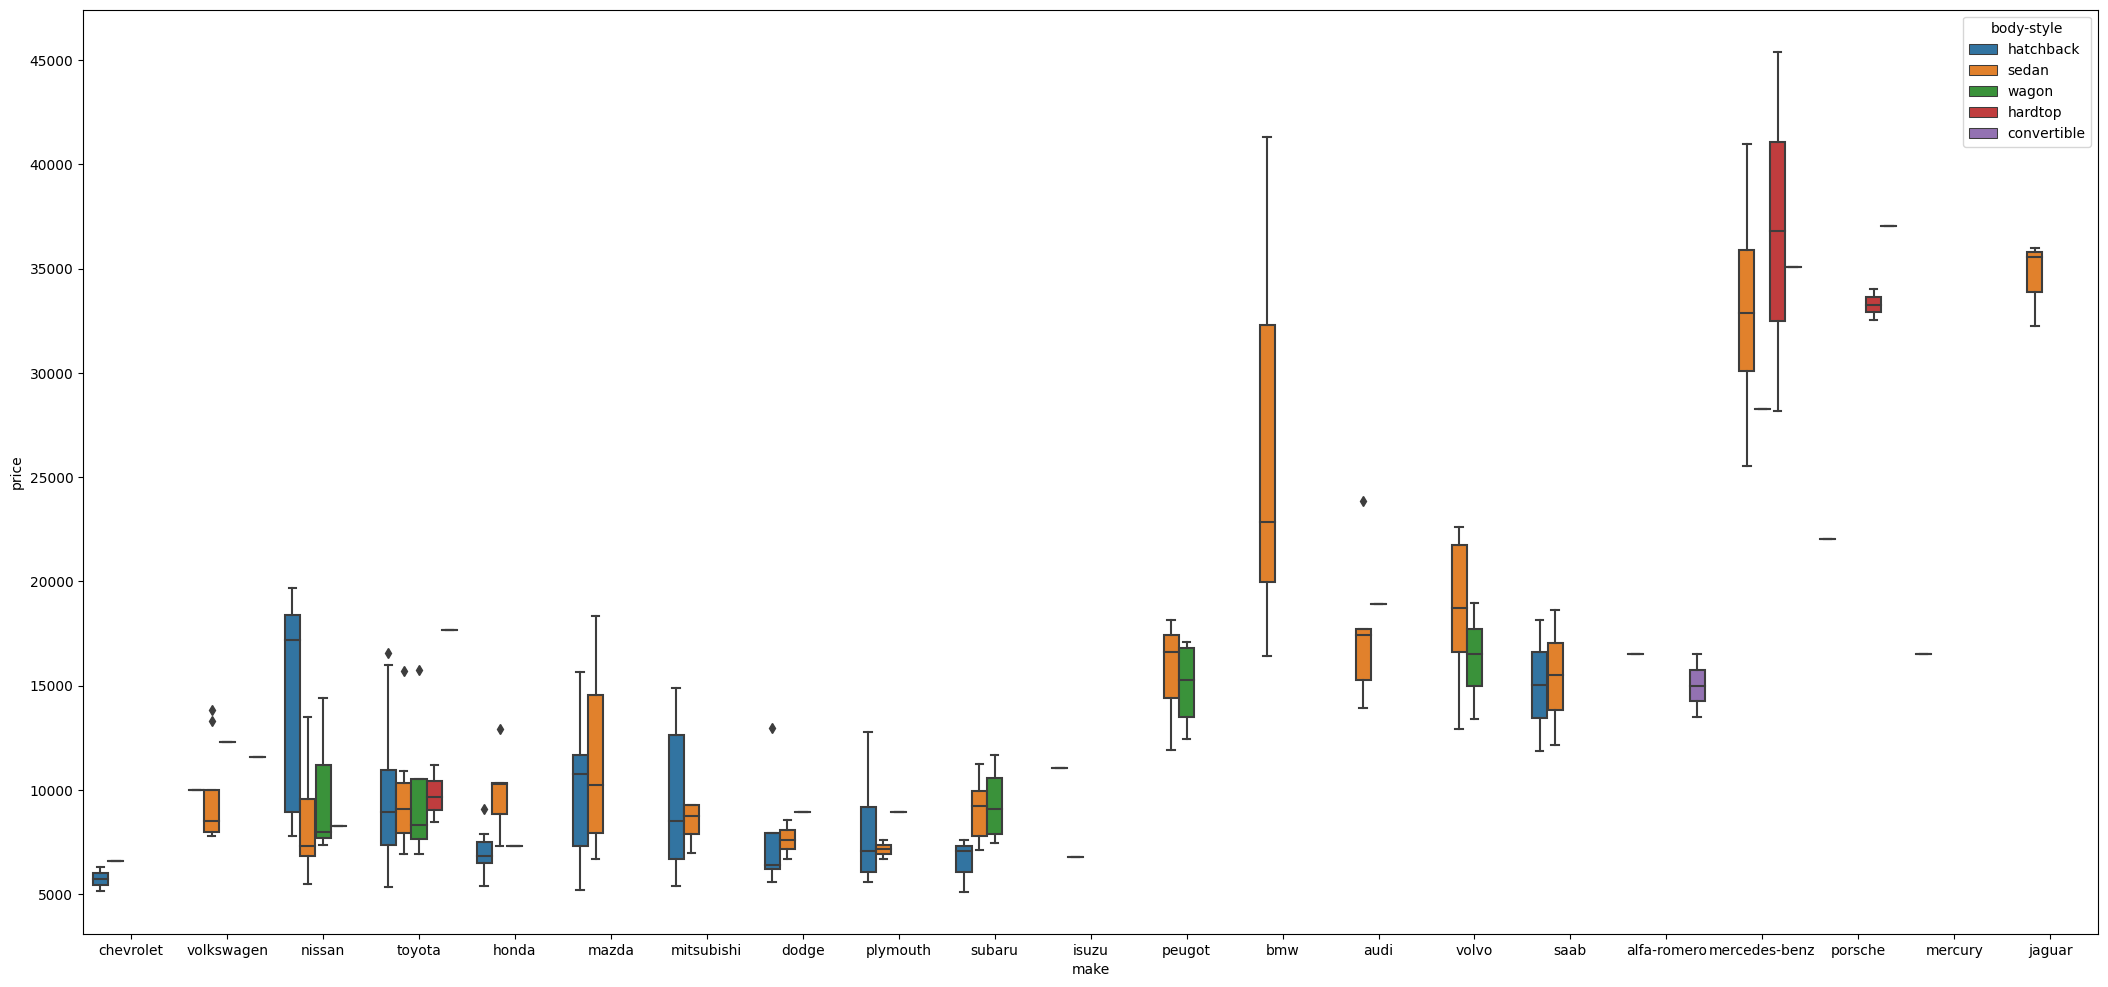

In [49]:
plt.figure(figsize=(26,12))
sns.boxplot(x="make",y="price",data=df,hue="body-style")

In [54]:
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
1,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775
2,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7995
3,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
4,toyota,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699
195,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528
196,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028
197,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028


In [55]:
pd.get_dummies(df["body-style"],prefix='body-style')

,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
194,0,0,1,0,0
195,0,1,0,0,0
196,0,1,0,0,0
197,1,0,0,0,0
